
# Project: Investigating No Show Appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
The dataset has 14 columns
'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Noshow'.

This dataset would analyse the number of people that show up for their appointments based on the relationship between gender, scholarship and SMS.  

The percentage of people that show up for their appointments would be investigated. We would also be looking at certain factors that affect people shpowing up for their appointments or missing them. Factors like scholarship and SMS and age group.


In [1]:
# Importing packages

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the dataset

df = pd.read_csv('noshow.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Displays information about each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
# Displays unique values in the dataset

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
# Displays the column data type

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
# Converts the AppointmentDay and ScheduledDay data type to datetime

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [8]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
# Displays the first 2 rows of the dataset

df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [10]:
# changes a column name

df.rename(columns ={'No-show': 'Noshow'}, inplace = True)

In [11]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.



### Data Cleaning 

In [12]:
# Takes out columns or rows from the dataset

df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

In [13]:
# Generates descriptive statistics

df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
# Takes out rows where the value of age is -1

df.drop(df[df.Age == -1].index, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis




### What percentage of people showed up for their appointment?

In [15]:
# Patients who showed up and those who didn't

df['Noshow'].value_counts()

No     88207
Yes    22319
Name: Noshow, dtype: int64

From this we can see that most of the patients showed up for their appointments. 

Text(0.5, 1.0, 'Percentage of People who Showed up')

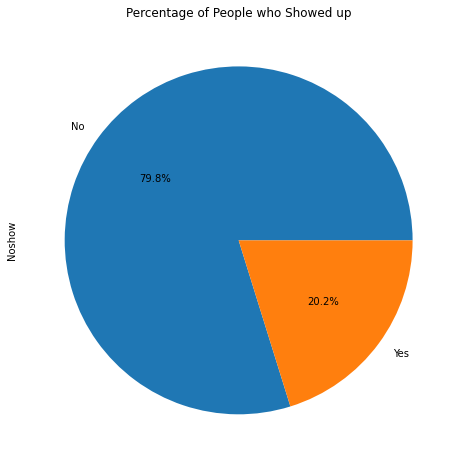

In [16]:
# A pie chart is used to show the percentage of scheduled patients who showed up

df['Noshow'].value_counts().plot(kind= 'pie', figsize = (8,8), autopct='%1.1f%%');
plt.title('Percentage of People who Showed up')

Over 70% of the patients showed up for their appointments

### Does Scholarship determine if patients show up for their appointment?

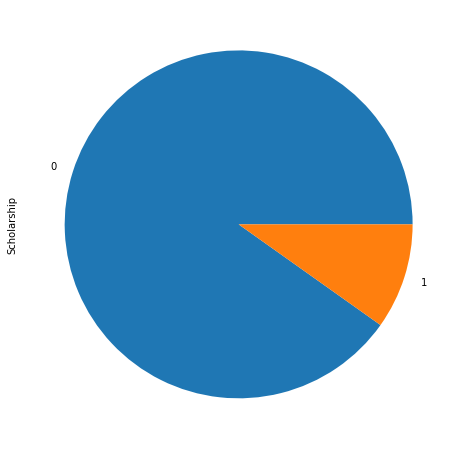

In [17]:
# The pie chart shows patients scholarship status

df['Scholarship'].value_counts().plot(kind= 'pie', figsize = (8,8))
labels = [('no_scholarship', 'scholarship')]

0 = No scholarship 1 = scholarship

In [18]:
# Gives a count of patients who have Scholarship and those who didn't

df['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

Most of the patients do not have scholarship

In [19]:
# Indexing the variables for the chart 

show = df[df['Noshow'] == 'No']
Noshow = df[df['Noshow'] == 'Yes']

In [20]:
# Creates a function to be used for plotting the bar charts

def plot(var):
    count = df.groupby(var)['Noshow'].value_counts().unstack()
    count.plot(kind='bar', figsize=(8,8))
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.legend(['Show', 'Noshow'])
    print(count)
    return count

Noshow          No    Yes
Scholarship              
0            79924  19741
1             8283   2578


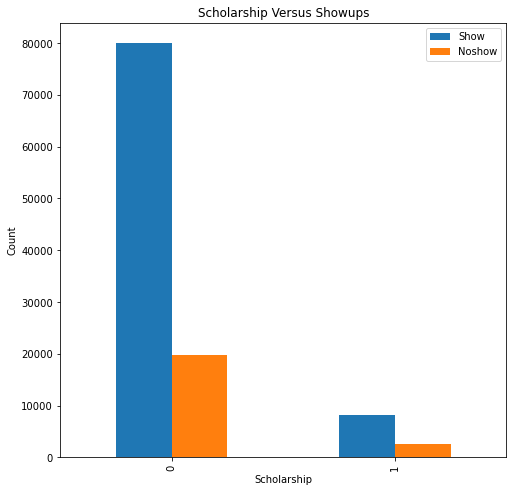

In [21]:
#  Compares Patient's appointment default rate with scholarship availabiility

plot('Scholarship')
plt.title('Scholarship Versus Showups');

Patients who do not have scholarships are less likely to miss their appointments 

### Does receiving an SMS reminder determine  if people miss their appointments or not?

In [22]:
# Number of patients who received SMS and those who did not

df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

0 = No SMS received 1 = SMS received

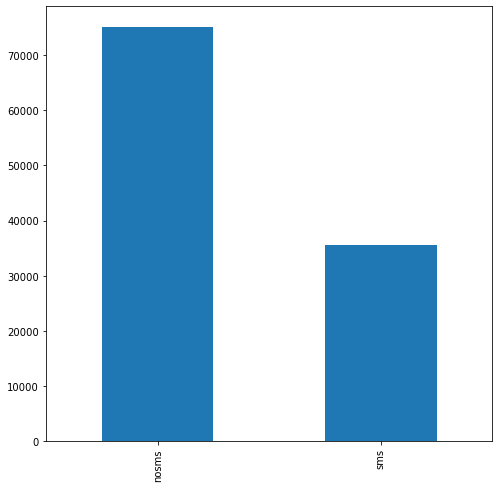

In [23]:
# The bar chart shows the distribution of customers who received SMS and those who didn't. 
# The labels for the chart are named and assigned

labels = ('nosms', 'sms')
df['SMS_received'].value_counts().plot(kind= 'bar', figsize = (8,8));
plt.xticks(np.arange(2), labels);

Noshow           No    Yes
SMS_received              
0             62509  12535
1             25698   9784


Text(0.5, 1.0, 'SMS')

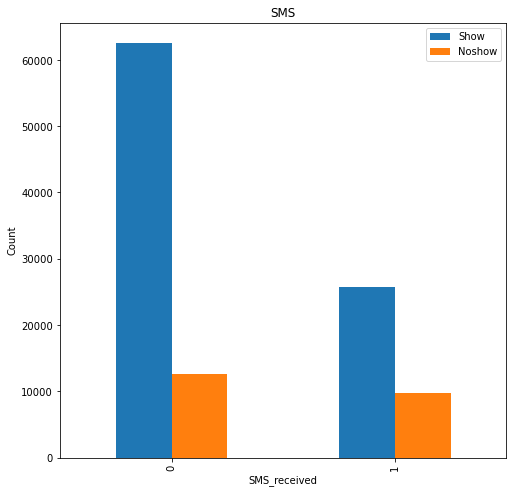

In [24]:
# Compares Patient's appointment default rate with SMS received and SMS not received

plot('SMS_received')
plt.title('SMS')


While most of the patients did not receive SMS, a larger section of those who did not receive sms showed up for their appointment.
Receiving or not receiving SMS does not seem to influence the patient's no show rate significantly.

### What Gender shows up more?

In [25]:
# Distribution of gender type among the patients

df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

Noshow     No    Yes
Gender              
F       57245  14594
M       30962   7725


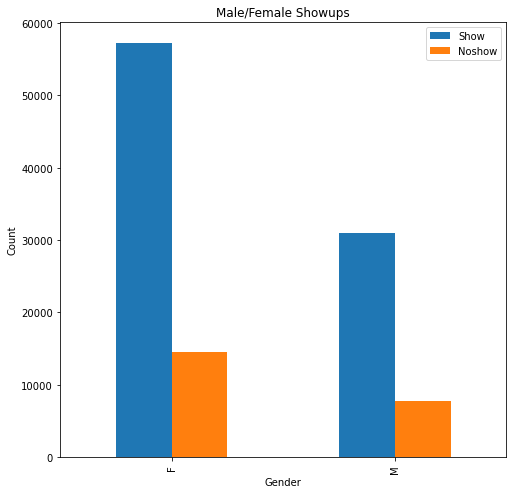

In [26]:
#  Compares gender type against appointment default

plot('Gender')

plt.title('Male/Female Showups');

The Female patients show up more for their appointments than the male counterparts.

<a id='conclusions'></a>
## Conclusions

The percentage of people who showed up for their appointment is about 80%. 

The gender distribution for the patient list has more women than men and this does not have any significant effect on the patient's decision to show up fo their appointments.

SMS received also did not significantly impact customer's decision to show up for the appointment or not show up.

The type of illness the patients suffered from was not considered in this analysis as the severity of the illness could also be a contributing factor to patients decision to show up or not for their scheduled appointments.

And while neighbourhood information was given, the hospital's location wasn't provided to assess if distance from the patient's neighbourhood to the hospital could be a major contributing factor to the 20% who couldn't show up.

Another factor which could also be looked at but the data wasn't included in the database but can influence patient's show or no show status is their employment status 